<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [12]:
!pip install pandas

### Step 1: Import Required Libraries


In [13]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [14]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [15]:
print(df.columns[0:60])

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith',
       'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal u

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [16]:
## Write your code here
# 2. Display shape of original dataset
print("Original dataset shape:", df.shape)

# 3. Define subset of columns to check for duplicates
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]

# 4. Identify number of duplicate rows based on subset
duplicates = df.duplicated(subset=subset_cols)
num_duplicates = duplicates.sum()

print("Number of duplicate rows based on subset columns:", num_duplicates)


Original dataset shape: (65437, 114)
Number of duplicate rows based on subset columns: 4853


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [17]:
## Write your code here
# 1. Remove duplicates based on subset columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# 2. Verify removal
print("Cleaned dataset shape:", df_cleaned.shape)

# Confirm there are no remaining duplicates
remaining_duplicates = df_cleaned.duplicated(subset=subset_cols).sum()
print("Remaining duplicates:", remaining_duplicates)


Cleaned dataset shape: (60584, 114)
Remaining duplicates: 0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [18]:
## Write your code here
# Count missing values in each column
missing_counts = df_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Sort and display
missing_counts = missing_counts.sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)


Missing values per column:
 AINextMuch less integrated    59489
AINextLess integrated         58346
AINextNo change               48553
AINextMuch more integrated    47638
EmbeddedAdmired               44379
                              ...  
DevType                        2856
AISelect                       2630
YearsCode                      2440
LearnCode                      1871
EdLevel                        1627
Length: 109, dtype: int64


In [19]:
# Find the most frequent value (mode) in EdLevel
most_common_edlevel = df_cleaned['EdLevel'].mode()[0]

# Fill missing values with the mode
df_cleaned['EdLevel'].fillna(most_common_edlevel, inplace=True)


/tmp/ipykernel_681/4268403851.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['EdLevel'].fillna(most_common_edlevel, inplace=True)
/tmp/ipykernel_681/4268403851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EdLevel'].fillna(most_common_edlevel, inplace=True)


In [20]:
print(df_cleaned['EdLevel'])

0                                Primary/elementary school
1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
3        Some college/university study without earning ...
4        Secondary school (e.g. American high school, G...
                               ...                        
65430         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65431         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65432         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65434         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
65435    Secondary school (e.g. American high school, G...
Name: EdLevel, Length: 60584, dtype: object


In [21]:
# Check how many missing values remain in the EdLevel column
print(df_cleaned['EdLevel'].isnull().sum())


0


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [22]:
## Write your code here
# 1. Check how many missing values are in the compensation column
missing_comp = df['ConvertedCompYearly'].isna().sum()
print(f"Missing values in ConvertedCompYearly: {missing_comp}")

Missing values in ConvertedCompYearly: 42002


In [24]:
print(df['ConvertedCompYearly'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: ConvertedCompYearly, Length: 65437, dtype: float64


In [ ]:
df.head()

In [25]:
# Drop rows where compensation is missing
df = df.dropna(subset=['ConvertedCompYearly'])

# Confirm the missing values are gone
print("Missing values after drop:", df['ConvertedCompYearly'].isna().sum())

# Check the new shape of the dataset
print("New dataset shape:", df.shape)


Missing values after drop: 0
New dataset shape: (23435, 114)


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [29]:
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 141.6 MB/s eta 0:00:00


/tmp/ipykernel_681/2205567556.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


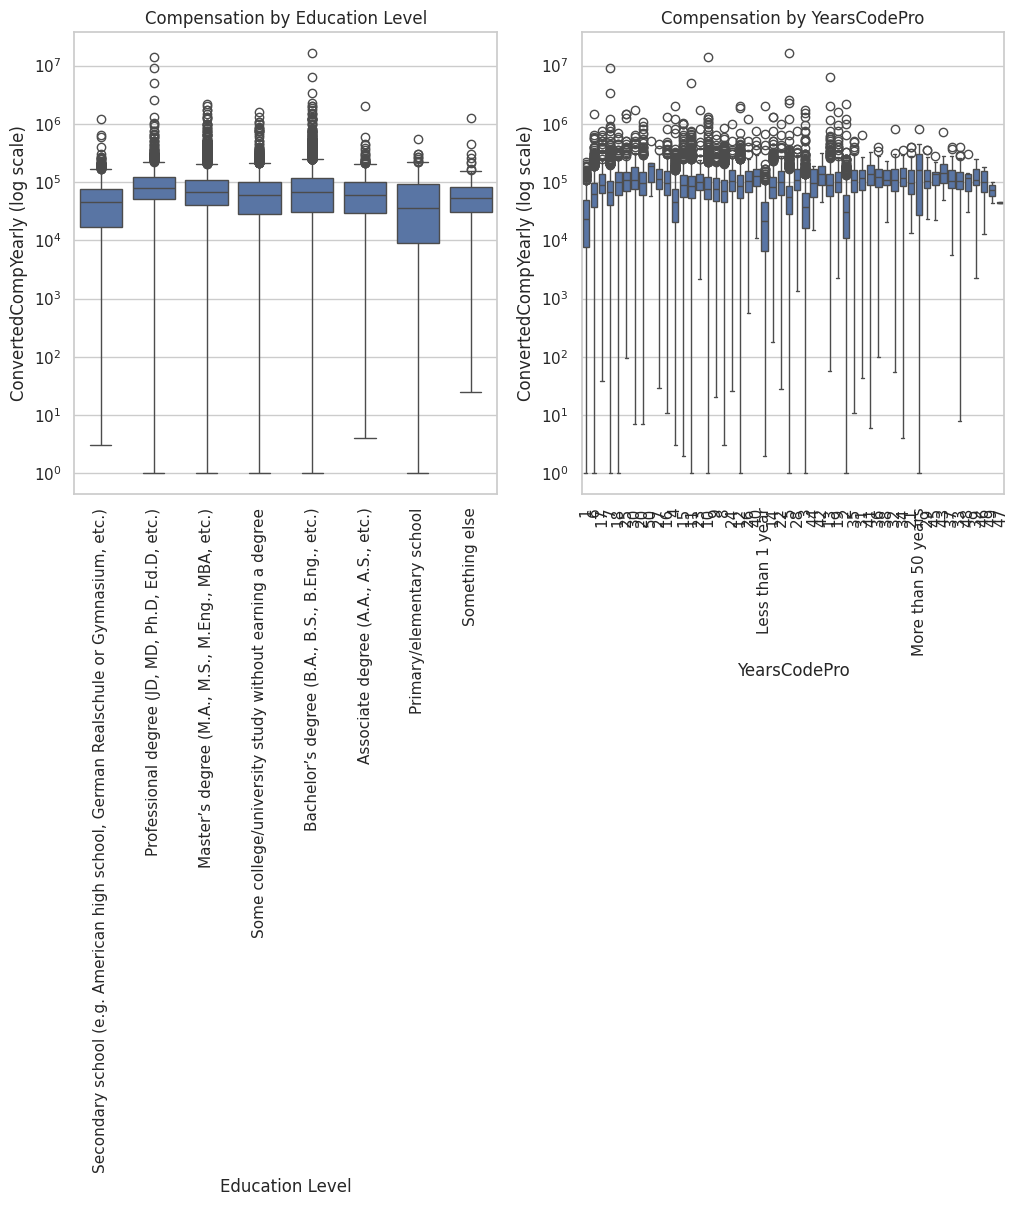

In [30]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Boxplot: Compensation by Education Level
plt.subplot(1, 2, 1)
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df)
plt.xticks(rotation=90)
plt.yscale('log')  # Compensation usually has a long tail
plt.title('Compensation by Education Level')
plt.xlabel('Education Level')
plt.ylabel('ConvertedCompYearly (log scale)')

# 2. Boxplot: Compensation by Years of Professional Coding
plt.subplot(1, 2, 2)
# Optional: simplify YearsCodePro categories if it's a string
df_filtered = df[df['YearsCodePro'].notna()]
sns.boxplot(x='YearsCodePro', y='ConvertedCompYearly', data=df_filtered)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Compensation by YearsCodePro')
plt.xlabel('YearsCodePro')
plt.ylabel('ConvertedCompYearly (log scale)')

plt.tight_layout()
plt.show()


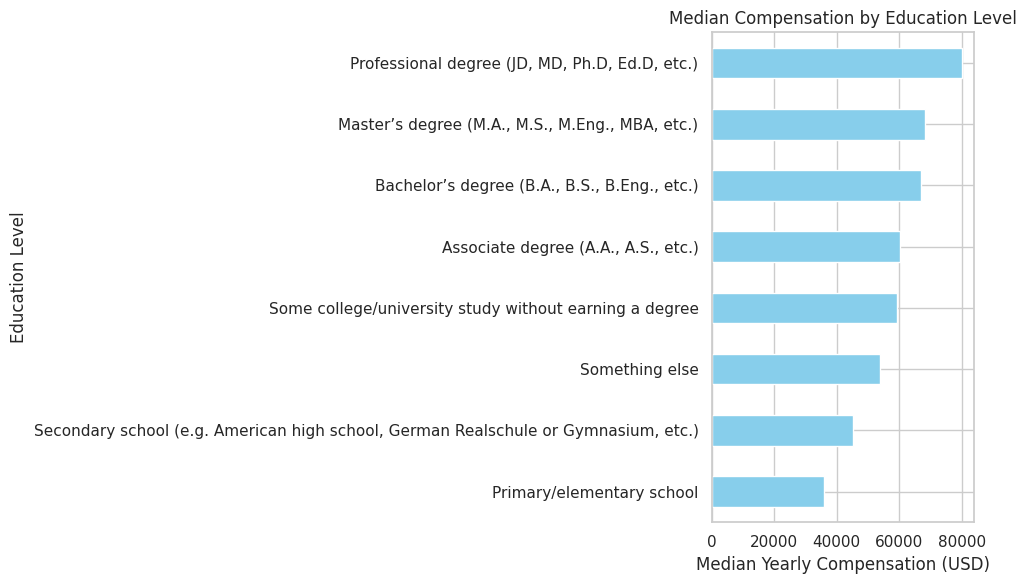

In [32]:
import matplotlib.pyplot as plt

# Drop missing values in the compensation or education level columns
df_median = df[['EdLevel', 'ConvertedCompYearly']].dropna()

# Group by education level and compute median
median_comp_by_ed = df_median.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values()

# Plot
plt.figure(figsize=(10, 6))
median_comp_by_ed.plot(kind='barh', color='skyblue')
plt.title('Median Compensation by Education Level')
plt.xlabel('Median Yearly Compensation (USD)')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()



<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
